In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test import *
import numpy as np

/home/lucas/.conda/envs/research_project/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1699449183005/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


torch.Size([128, 48, 32])
tensor([[ 0.5633, -0.5844,  0.2158,  ...,  0.1178, -0.0980,  0.0422],
        [ 0.0070,  0.1480,  0.5541,  ..., -0.1208, -0.2816,  0.1752],
        [-0.1225,  0.0320, -0.0350,  ..., -0.6430, -0.4105,  0.0182],
        ...,
        [-0.0410,  0.4086,  0.0949,  ...,  0.3468, -0.7162,  0.4515],
        [ 0.1193, -0.5153,  0.2310,  ...,  0.2174,  0.2272,  1.1194],
        [ 0.4244, -0.0996, -0.3332,  ..., -0.3931,  0.0363,  0.1173]],
       device='cuda:0')
tensor([[-0.0483,  1.5796, -1.1432,  ...,  0.2071, -0.2396,  0.0244],
        [-0.0338, -0.0744,  0.2852,  ...,  0.0717,  0.0891,  0.0849],
        [ 0.4570,  0.1434,  0.0433,  ...,  0.0048,  0.3969, -0.3274],
        ...,
        [ 0.0721,  0.2505,  0.2346,  ...,  0.0127, -0.3554,  0.1620],
        [ 0.0495, -0.1037,  0.4015,  ...,  0.1464,  0.5545,  0.2311],
        [-0.2121,  0.0812,  1.2676,  ..., -0.9047,  1.0781, -0.6052]],
       device='cuda:0')
tensor([[21.7558, 10.6785, 11.5811,  ..., 16.9024, 20.6112

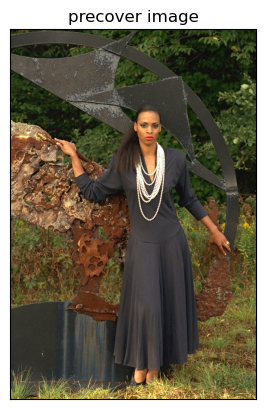

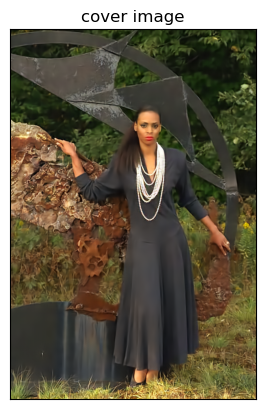

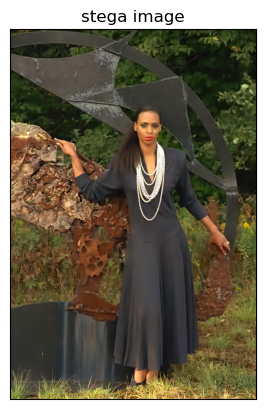

In [3]:
selection = np.random.choice(24,1)
test("./checkpoints/baseline/iter_1590000.pth.tar",selection,stega=True,p=0.3)

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def H(p):
    return -2*p*math.log(p,2) - (1-2*p)*math.log(1-2*p,2)

P = np.linspace(0.01,0.49,50)
H_p = [H(p) for p in P]

Text(0, 0.5, 'H(p) (bits)')

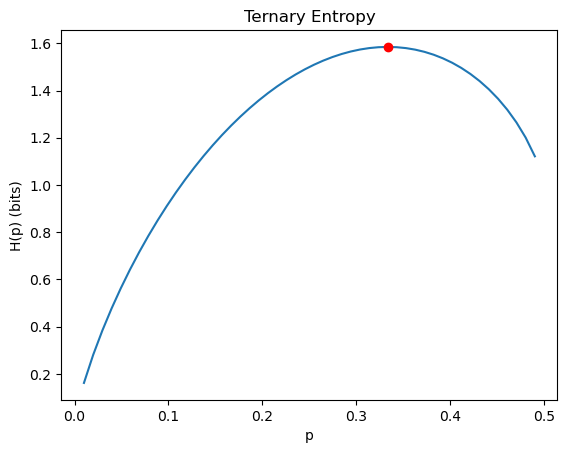

In [5]:
plt.plot(P,H_p)
plt.title("Ternary Entropy")
plt.plot([1/3],[H(1/3)],"or")
plt.xlabel("p")
plt.ylabel("H(p) (bits)")